<p>En este proyecto, utilizaremos aprendizaje automático no supervisado para categorizar a los clientes según las características de su comportamiento de compra. El marketing predictivo puede ayudar a las empresas a encontrar clientes que tengan demandas similares o respondan de manera similar a una actividad de marketing particular. Además, gracias a nuestra investigación, sin duda podemos ayudar a las empresas a determinar las categorías adecuadas para dirigir sus campañas de marketing dirigidas. Para lograr el éxito, utilizaremos una metodología de cinco pasos para completar con éxito esta extensa investigación.</p>
<ul>
    <li><p><b>order_id:</b> Un número único para identificar el pedido</p></li>
    <li><p><b>user_id:</b> un número único para identificar al usuario</p></li>
    <li><p><b>order_number:</b> número de veces que ha pedido este conjunto de artículos</p></li>
    <li><p><b>order_dow:</b>Día de la semana en que se realizó el pedido </p></li>
    <li><p><b>order_hour_of_day:</b> hora del pedido </p></li>
    <li><p><b>days_since_prior_order:</b> es una medida de cuántos días han pasado desde el pedido anterior. </p></li>
    <li><p><b>product_id:</b> id del producto </p></li>
    <li><p><b>add_to_cart_order:</b> Número de artículos agregados al carrito </p></li>
    <li><p><b>reordered:</b> ha sido comprado más de una vez</p></li>
    <li><p><b>department_id:</b> id del departamento</p></li>
    <li><p><b>department:</b> nombre del departamento</p></li>
    <li><p><b>product_name:</b> nombre del producto </p></li>
</ul>

In [11]:
import csv

dataset = []
with open('ecommerce.csv', 'r') as csv_file:
    rows = csv.reader(csv_file, delimiter=",")
    for i, row in enumerate(rows):
        dataset.append(row)
        if i < 30:
            print(row)

['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'department_id', 'department', 'product_name']
['2425083', '49125', '1', '2', '18', '', '17', '1', '0', '13', 'pantry', 'baking ingredients']
['2425083', '49125', '1', '2', '18', '', '91', '2', '0', '16', 'dairy eggs', 'soy lactosefree']
['2425083', '49125', '1', '2', '18', '', '36', '3', '0', '16', 'dairy eggs', 'butter']
['2425083', '49125', '1', '2', '18', '', '83', '4', '0', '4', 'produce', 'fresh vegetables']
['2425083', '49125', '1', '2', '18', '', '83', '5', '0', '4', 'produce', 'fresh vegetables']
['2425083', '49125', '1', '2', '18', '', '91', '6', '0', '16', 'dairy eggs', 'soy lactosefree']
['2425083', '49125', '1', '2', '18', '', '120', '7', '0', '16', 'dairy eggs', 'yogurt']
['2425083', '49125', '1', '2', '18', '', '59', '8', '0', '15', 'canned goods', 'canned meals beans']
['2425083', '49125', '1', '2', '18', '', '35', '9', '0',

In [12]:
order_products = {}
for i, data in enumerate(dataset):
    if i != 0:
        order_id = int(data[0])
        if order_id not in order_products:
            order_products[order_id] = 0
        order_products[order_id] += 1
        
values_dict = {}

for i, order_id in enumerate(order_products):
    if order_products[order_id] not in values_dict:
        values_dict[order_products[order_id]] = 0
    values_dict[order_products[order_id]] += 1

for i, num_prod in enumerate(values_dict):
    print(f"Number product: {num_prod}: Repeat {values_dict[num_prod]}")
    if i == 10:
             break

Number product: 9: Repeat 590
Number product: 13: Repeat 356
Number product: 15: Repeat 273
Number product: 11: Repeat 465
Number product: 6: Repeat 665
Number product: 2: Repeat 538
Number product: 12: Repeat 431
Number product: 23: Repeat 87
Number product: 35: Repeat 17
Number product: 8: Repeat 646
Number product: 1: Repeat 518


[9, 13, 15, 11, 6, 2, 12, 23, 35, 8]
[590, 356, 273, 465, 665, 538, 431, 87, 17, 646]


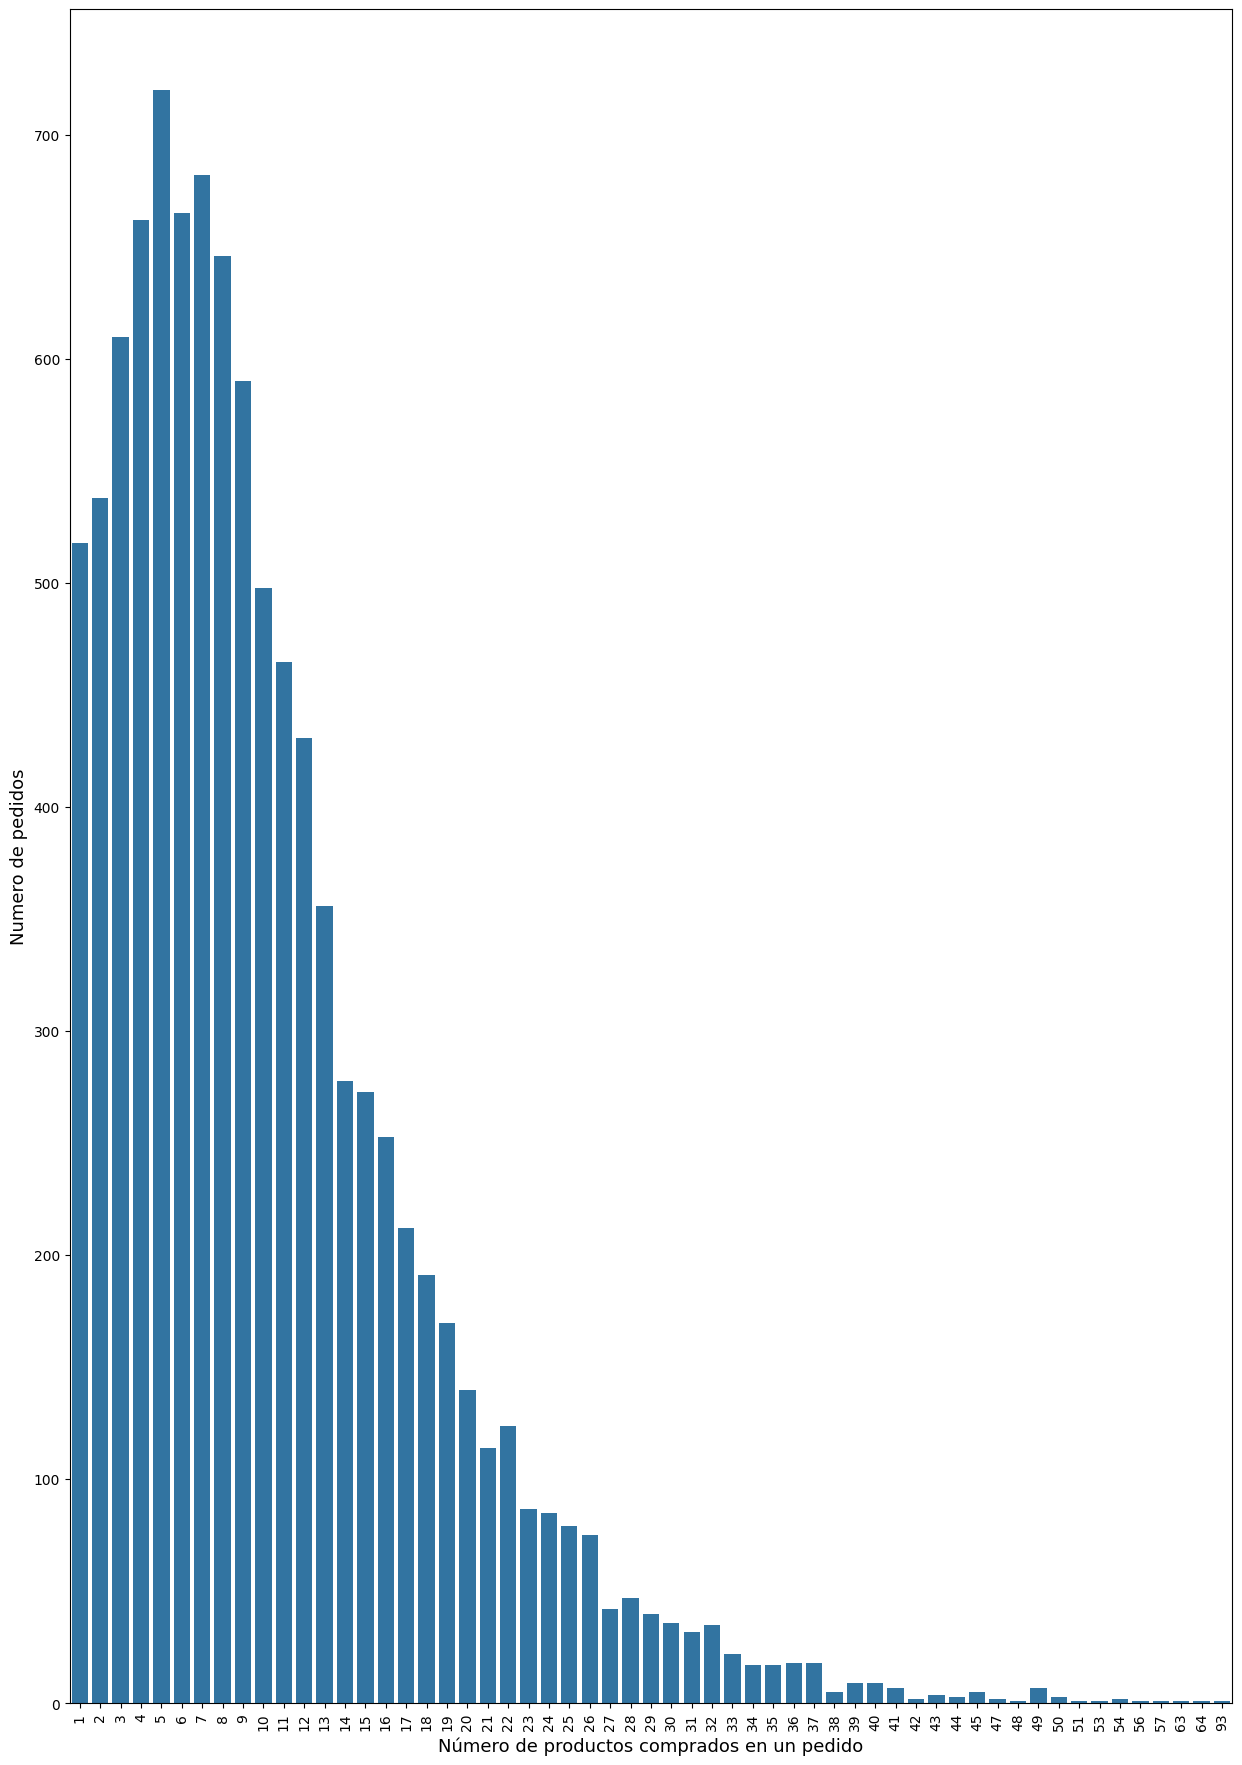

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
x = []
y = []


for i, num_prod in enumerate(values_dict):
    x.append(num_prod)
    y.append(values_dict[num_prod])
    
print(x[:10])
print(y[:10])


f, ax = plt.subplots(figsize=(15,22))
plt.xticks(rotation='vertical')
sns.barplot(x=x, y=y)
sns.color_palette("husl",10)

plt.ylabel('Numero de pedidos', fontsize=13)
plt.xlabel('Número de productos comprados en un pedido', fontsize=13)
plt.show()

Number product: fresh fruits: Repeat 11499
Number product: fresh vegetables: Repeat 10457
Number product: packaged vegetables fruits: Repeat 5336
Number product: yogurt: Repeat 4470
Number product: packaged cheese: Repeat 3006
Number product: milk: Repeat 2731
Number product: water seltzer sparkling water: Repeat 2489
Number product: chips pretzels: Repeat 2225
Number product: soy lactosefree: Repeat 1954
Number product: bread: Repeat 1753
Number product: refrigerated: Repeat 1722
['fresh fruits', 'fresh vegetables', 'packaged vegetables fruits', 'yogurt', 'packaged cheese', 'milk', 'water seltzer sparkling water', 'chips pretzels', 'soy lactosefree', 'bread']
[11499, 10457, 5336, 4470, 3006, 2731, 2489, 2225, 1954, 1753]


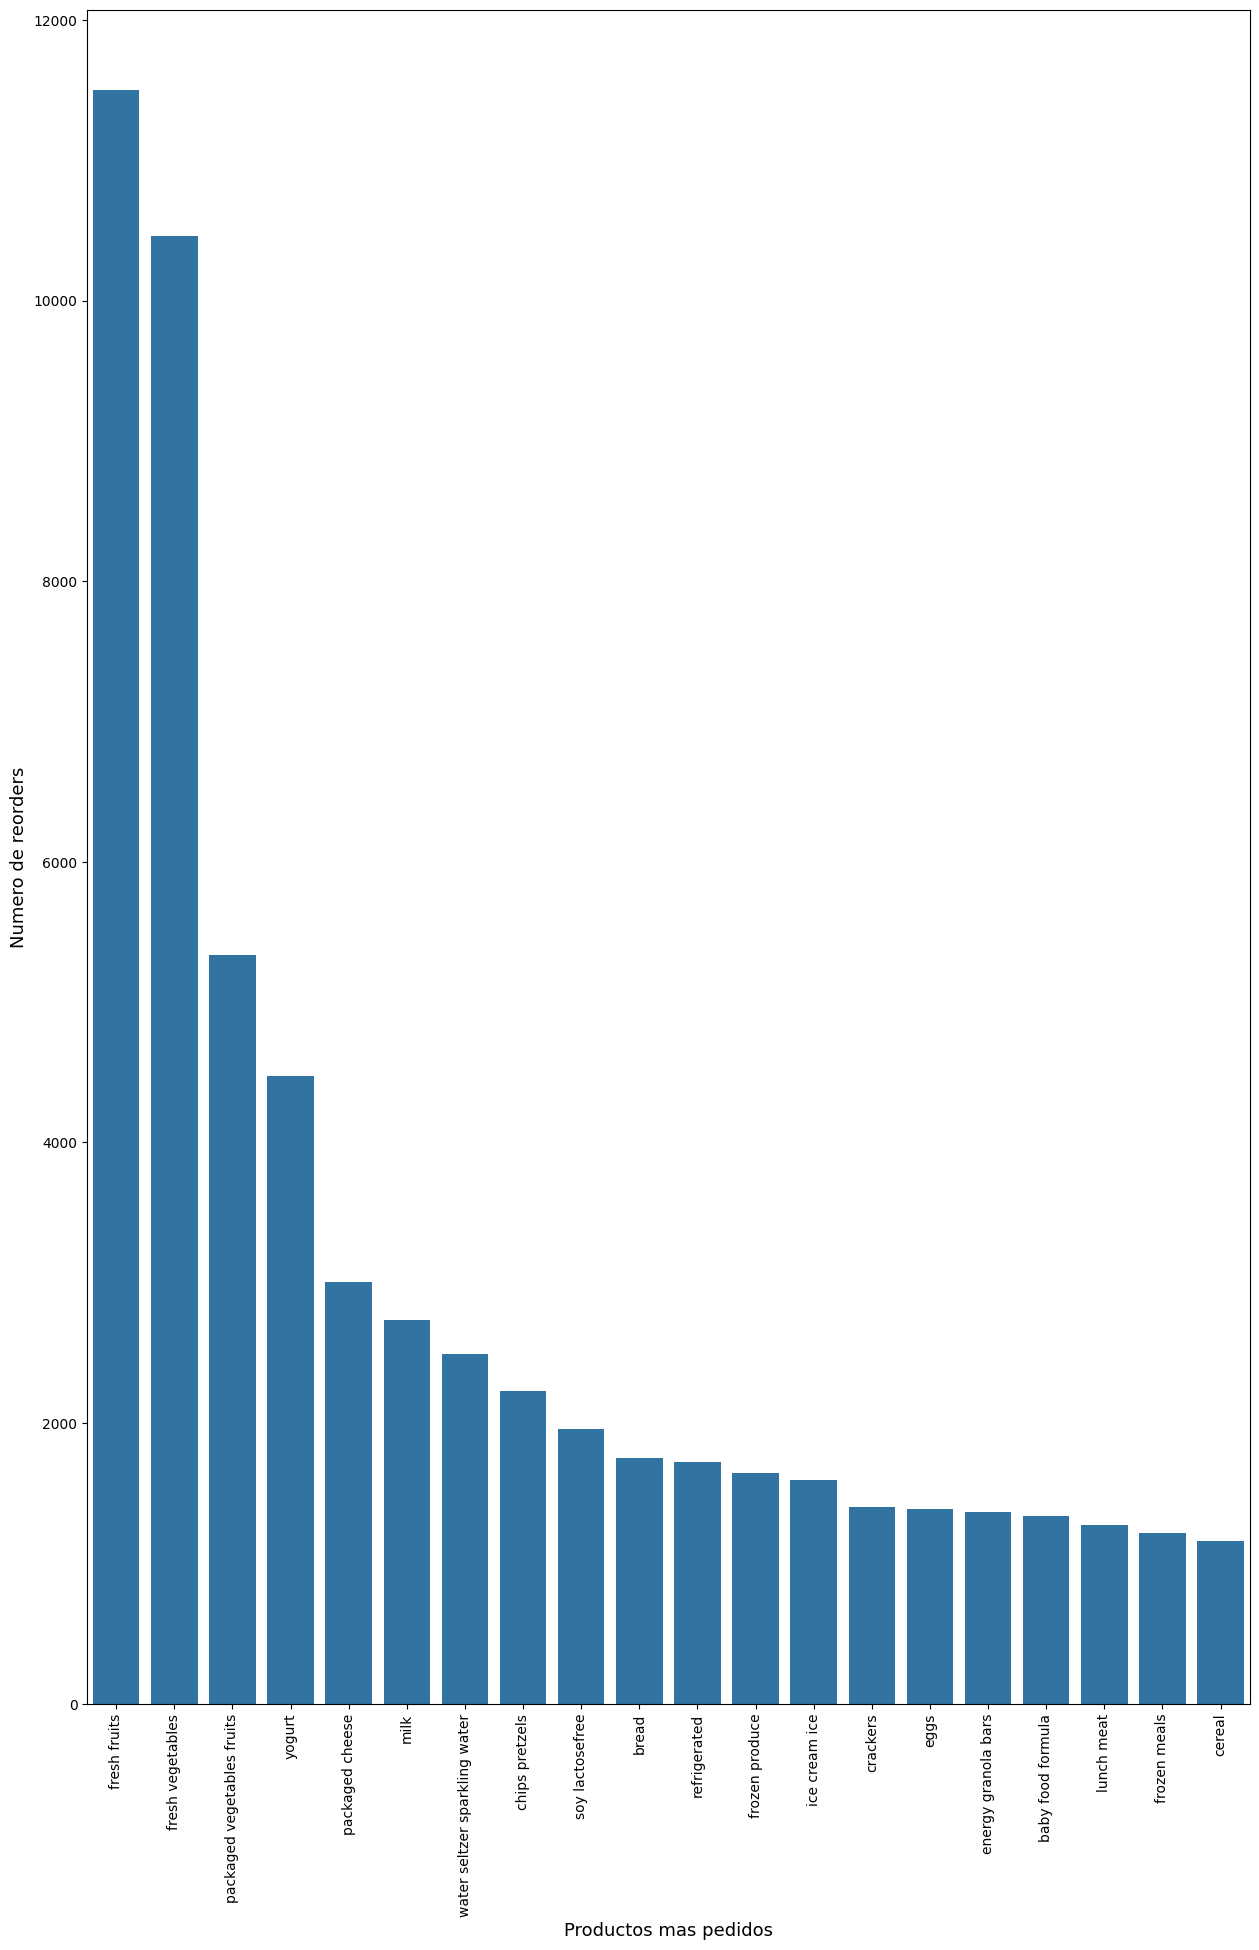

In [14]:
order_products = {}
for i, data in enumerate(dataset):
    if i != 0:
        product_name = data[11]
        if product_name not in order_products:
            order_products[product_name] = 0
        order_products[product_name] += 1
        


order_dict = {k: v for k, v in sorted(order_products.items(), key=lambda item: item[1], reverse=True)}
for i, num_prod in enumerate(order_dict):
    print(f"Number product: {num_prod}: Repeat {order_dict[num_prod]}")
    if i == 10:
             break
            
                       
import matplotlib.pyplot as plt
import seaborn as sns
x = []
y = []


for i, num_prod in enumerate(order_dict):
    x.append(num_prod)
    y.append(order_dict[num_prod])
    
print(x[:10])
print(y[:10])


f, ax = plt.subplots(figsize=(15,22))
plt.xticks(rotation='vertical')
sns.barplot(x=x[:20], y=y[:20])
sns.color_palette("husl",10)

plt.ylabel('Numero de reorders', fontsize=13)
plt.xlabel('Productos mas pedidos', fontsize=13)
plt.show()

In [15]:
x_train = []

with open('ecommerce.csv', 'r') as csv_file:
    rows = csv.reader(csv_file, delimiter=",")
    for i, row in enumerate(rows):
        if i != 0:
            
            if row[5] == "":
                prior_order = -1
            else:
                prior_order = float(row[5])
                
                
            x_train.append([int(row[2]), int(row[3]), int (row[4]), prior_order,
                           int (row[6]), int (row[7]), int (row[8]), int (row[9]) ])
            
print(x_train[:10])

[[1, 2, 18, -1, 17, 1, 0, 13], [1, 2, 18, -1, 91, 2, 0, 16], [1, 2, 18, -1, 36, 3, 0, 16], [1, 2, 18, -1, 83, 4, 0, 4], [1, 2, 18, -1, 83, 5, 0, 4], [1, 2, 18, -1, 91, 6, 0, 16], [1, 2, 18, -1, 120, 7, 0, 16], [1, 2, 18, -1, 59, 8, 0, 15], [1, 2, 18, -1, 35, 9, 0, 12], [1, 3, 17, -1, 37, 1, 0, 1]]


In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
kmeans = kmeans.fit(x_train)

print("La clasificacion de los elementos en custers: ", kmeans.labels_)

print("La inercia es: ", kmeans.inertia_)


La clasificacion de los elementos en custers:  [0 3 0 ... 0 0 1]
La inercia es:  50546621.20578465


In [17]:
no_of_clusters = range(2,10)
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=42, n_init="auto")
    kmeans = kmeans.fit(x_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("Inercia para: ", f, "El cluster es: ", u)

Inercia para:  2 El cluster es:  80062820.44945917
Inercia para:  3 El cluster es:  66700078.43896714
Inercia para:  4 El cluster es:  50546621.20578465
Inercia para:  5 El cluster es:  42695148.27862408
Inercia para:  6 El cluster es:  38190546.41741248
Inercia para:  7 El cluster es:  35526752.46343981
Inercia para:  8 El cluster es:  33713787.104232386
Inercia para:  9 El cluster es:  32171601.18022274


Text(0.5, 1.0, 'Inertia Plot per k')

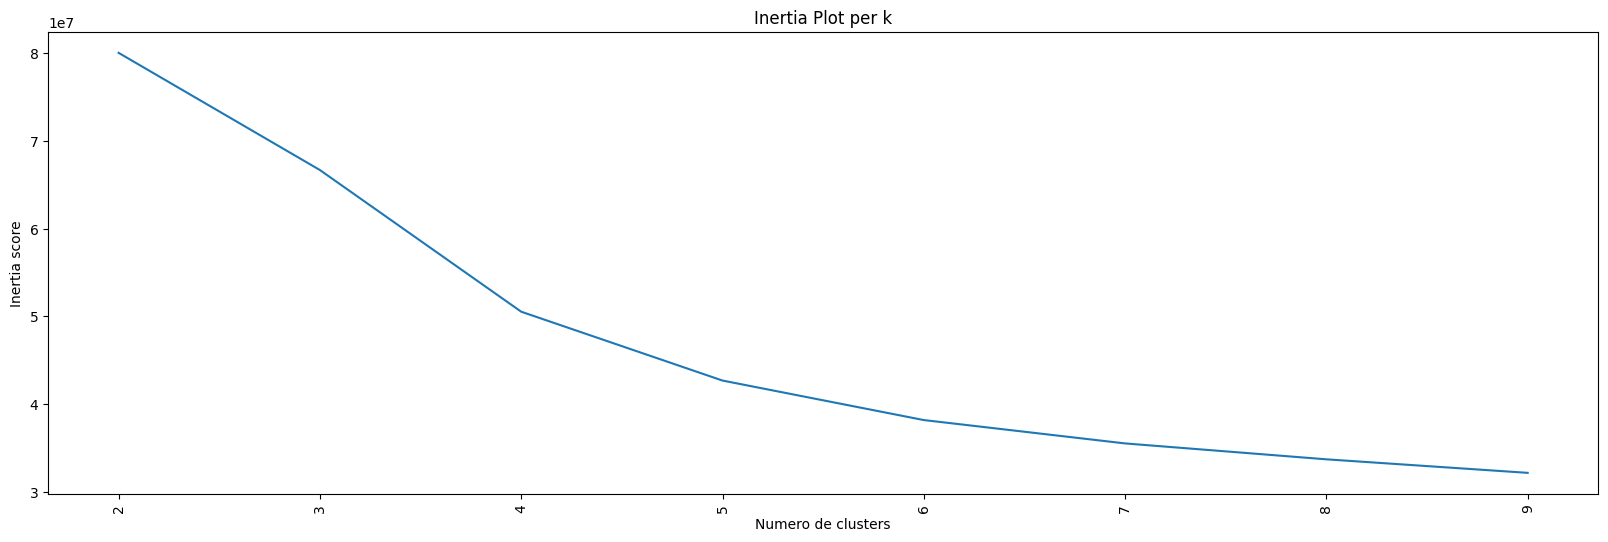

In [18]:
import numpy as np

fig, (ax1) = plt.subplots(1, figsize = (20, 6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation = "vertical")
plt.xlabel("Numero de clusters")
plt.ylabel("Inertia score")
plt.title("Inertia Plot per k")

In [19]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
kmeans = kmeans.fit(x_train)

predictions = kmeans.predict(x_train)

print(len(predictions))

print(predictions)

unique, counts = np.unique(predictions, return_counts = True)

for i, count in enumerate(counts):
    print(f"Cluster {i}: {count}")

100000
[0 3 0 ... 0 0 1]
Cluster 0: 35636
Cluster 1: 24523
Cluster 2: 8749
Cluster 3: 31092


<Figure size 640x480 with 0 Axes>

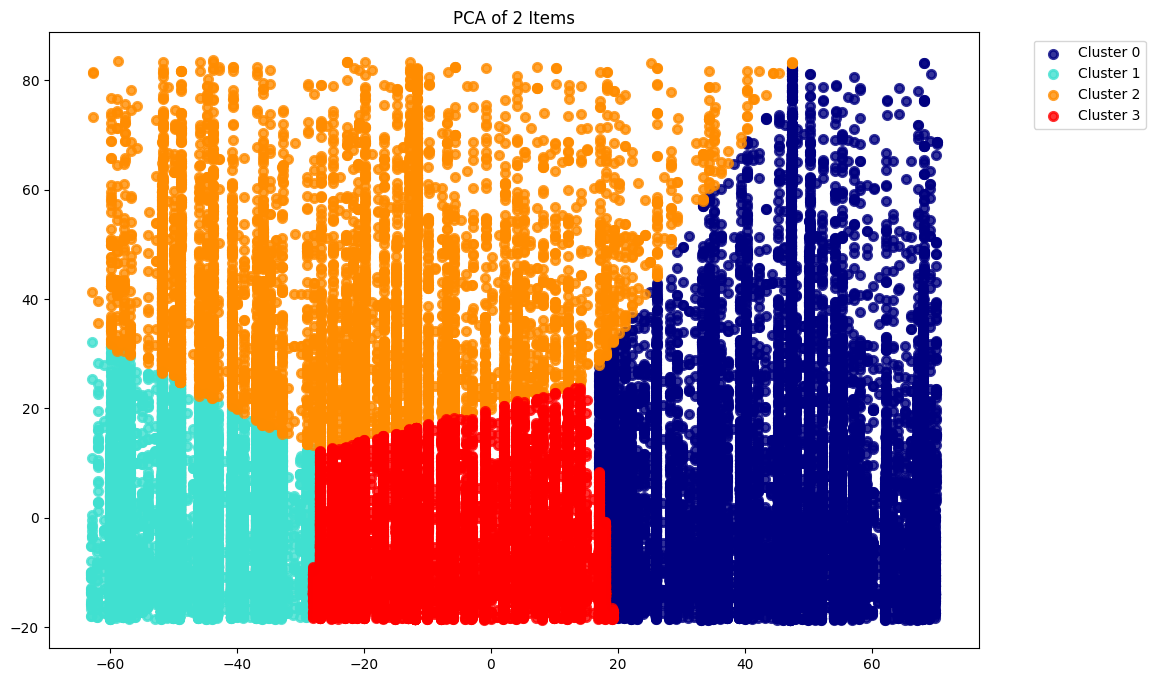

In [20]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = x_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3"]

pca = PCA(n_components=2, random_state=42)
X_r = pca.fit(X).transform(X)



plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0,1,2,3], target_names):
    plt.scatter(X_r[y_num == i,0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.6)
plt.title('PCA of 2 Items')
plt.show()